# Model Performance

In [7]:
import os
from pathlib import Path

import matplotlib.pylab as plt
import polars as pl
from joblib import load
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [8]:
data_path = Path(os.path.abspath("")).parents[0] / "data"
transformed_data_path = data_path / "transformed_data.parquet"
model_path = data_path / "model.joblib"

transformed_data = pl.read_parquet(transformed_data_path)
x_data = transformed_data.select(pl.selectors.exclude("class"))
y_data = transformed_data.select("class")
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, shuffle=True, random_state=0, stratify=y_data
)

model = load(model_path)

## Confusion Matrix

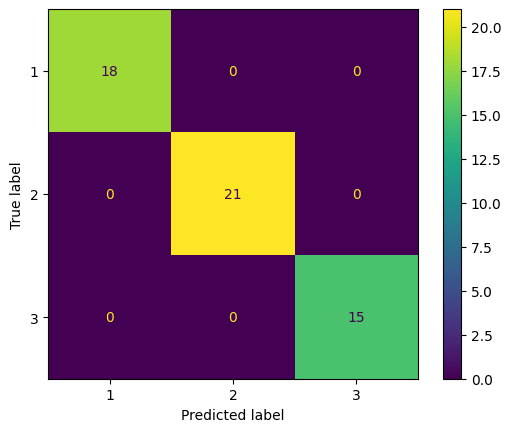

In [9]:
ConfusionMatrixDisplay.from_estimator(model, X=x_test, y=y_test)
plt.show()